# 改めてデータ観察

In [1]:
from pathlib import Path
import numpy as np

from util.plot.heatmap import plot_csi
from util.preprocess.csi.denoising import hampel_filter
from util.preprocess.csi.normalize import normalize_csi_amplitudes_by_frame_power
from util.preprocess.csi.phase import remove_timing_offset

In [14]:
def get_session_dirpaths(location):
    location_data_dirpath = resampled_data_dirpath / location
    
    # サブディレクトリをすべて取得
    return [d for d in location_data_dirpath.iterdir() if d.is_dir()]

In [95]:
def amp_preprocess(amp):
    # Filtering
    amp = hampel_filter(amp, window_size=200, n_sigmas=3)

    return amp

def phase_preprocess(phase):
    # Unwrap
    phase = np.unwrap(phase, axis=1)
    # Remove Timing Offset
    phase = remove_timing_offset(phase)
    # Filtering
    phase_filtered = hampel_filter(phase, window_size=200, n_sigmas=3)

    return phase

In [97]:
def windowing(data, window_size):
    # スライディングウィンドウを適用して、(N, window_size, features)の形に変換
    shape = (data.shape[0] // window_size, window_size, data.shape[1])
    return data[:shape[0] * window_size].reshape(shape)

In [96]:
root_data_dirpath = Path('/tf/workspace/deformation-prediction-multi-environment/data')
resampled_data_dirpath = root_data_dirpath / 'preprocessed' / 'csi' / 'resampled'
save_dirpath = root_data_dirpath / 'preprocessed' / 'csi' / 'amp_and_phase_no_norm'

In [10]:
trash_subcarriers = [0,1,2,3,4,5,32,59,60,61,62,63]
useful_subcarriers = [k for k in range(64) if k not in trash_subcarriers]

In [ ]:
for location in ['511', '512', '514B']:
    session_dirpaths = get_session_dirpaths(location)

    amplitudes = []
    phases = []
    for session_dirpath in session_dirpaths:
        amp = np.load(session_dirpath / 'amp.npy')[:, useful_subcarriers]
        phase = np.load(session_dirpath / 'phase.npy')[:, useful_subcarriers]

        amplitudes.append(amp_preprocess(amp))
        phases.append(phase_preprocess(phase))

    concatenated_amp = np.concatenate(amplitudes)
    concatenated_phase = np.concatenate(phases)

    csi = np.stack((windowing(concatenated_amp, 10), windowing(concatenated_phase, 10)), axis=-1)

    print(csi.shape)

    save_location_dirpath = save_dirpath / location
    save_location_dirpath.mkdir(parents=True, exist_ok=True)
    np.save(save_location_dirpath / 'csi.npy', csi)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

(12000, 10, 52, 2)


Output()

Output()

# Observation

In [45]:
session_dirpaths = get_session_dirpaths('512')

In [46]:
session_dirpaths

[PosixPath('/tf/workspace/deformation-prediction-multi-environment/data/preprocessed/csi/resampled/512/session_20240926_151603'),
 PosixPath('/tf/workspace/deformation-prediction-multi-environment/data/preprocessed/csi/resampled/512/session_20240926_152330'),
 PosixPath('/tf/workspace/deformation-prediction-multi-environment/data/preprocessed/csi/resampled/512/session_20240926_153446'),
 PosixPath('/tf/workspace/deformation-prediction-multi-environment/data/preprocessed/csi/resampled/512/session_20240926_154624')]

In [84]:
session_dirpath = session_dirpaths[2]

In [87]:
amp = np.load(session_dirpath / 'amp.npy')[:, useful_subcarriers]
phase = np.load(session_dirpath / 'phase.npy')[:, useful_subcarriers]
real = np.load(session_dirpath / 'real.npy')[:, useful_subcarriers]
imag = np.load(session_dirpath / 'imag.npy')[:, useful_subcarriers]

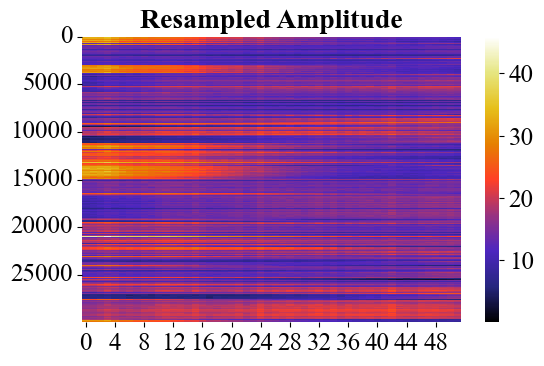

In [86]:
plot_csi(amp, 'Resampled Amplitude')

In [88]:
amp_filtered = hampel_filter(amp, window_size=200, n_sigmas=3)

Output()

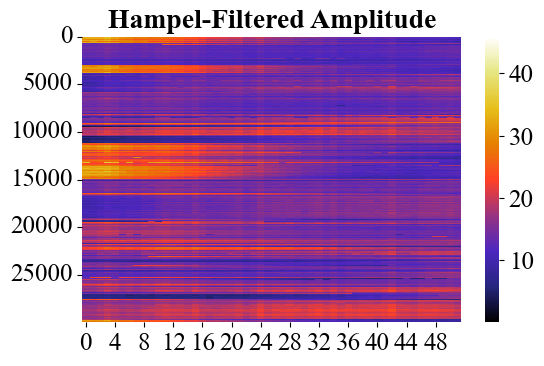

In [89]:
plot_csi(amp_filtered, 'Hampel-Filtered Amplitude')

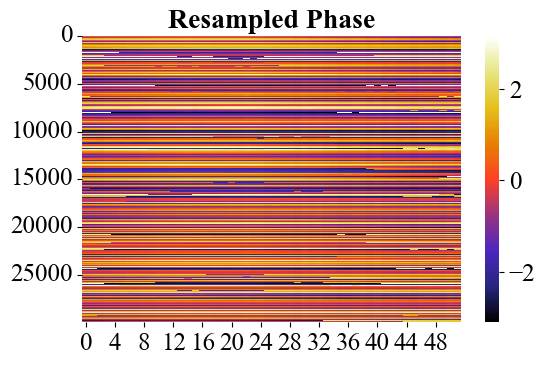

In [91]:
plot_csi(phase, 'Resampled Phase')

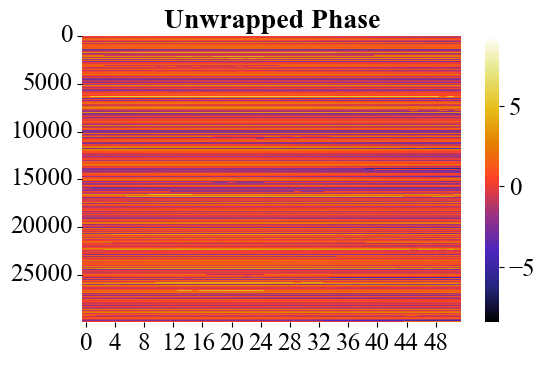

In [92]:
unwrapped_phase = np.unwrap(phase)
plot_csi(unwrapped_phase, 'Unwrapped Phase')

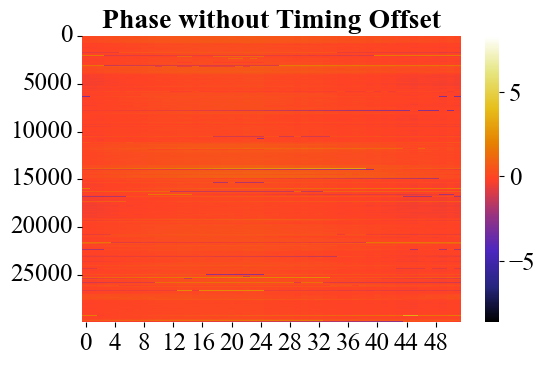

In [93]:
phase_without_to = remove_timing_offset(unwrapped_phase)
plot_csi(phase_without_to, 'Phase without Timing Offset')

Output()

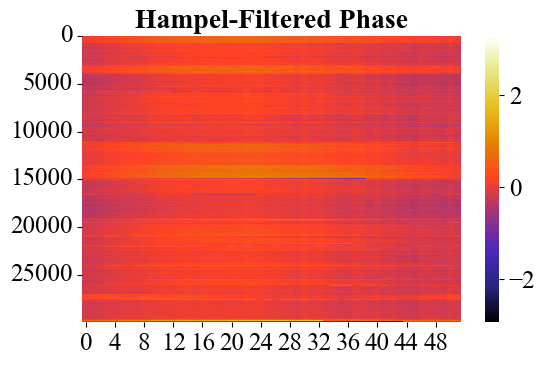

In [94]:
phase_filtered = hampel_filter(phase_without_to, window_size=200, n_sigmas=3)
plot_csi(phase_filtered, 'Hampel-Filtered Phase')